In [19]:
import pandas as pd

df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
print(df.shape)
passengers = list(df['#Passengers'])
passengers[:10]

(144, 2)


[112, 118, 132, 129, 121, 135, 148, 148, 136, 119]

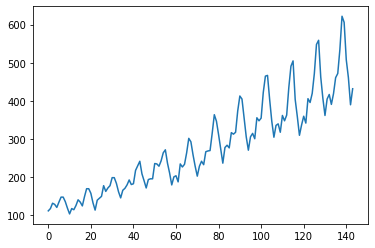

In [21]:
import matplotlib.pyplot as plt

plt.plot(passengers)
plt.show()

In [22]:
train_size = 60

In [23]:
# raw_month = list(df['Month'])

# train_x = []
# test_x = []

# for i in range(len(raw_month)):
#     year = int( raw_month[i].split('-')[0] )
#     month = int( raw_month[i].split('-')[1] )
#     if i<train_size:
#         train_x.append( [year, month] )
#     else:
#         test_x.append( [year, month] )

# print(len(train_x), train_x[:15], sep=" --> ")
# print(len(test_x), test_x[:15], sep=" --> ")

In [24]:
look_back = 12

train_x, train_y = [], []

for i in range(look_back, len(passengers)):
    # print(f"index {i} --> {passengers[i-look_back : i][:-1]} --> {passengers[i-look_back : i][-1]}")

    train_x.append( passengers[i-look_back : i][:-1] )
    train_y.append( passengers[i-look_back : i][-1] )

In [25]:
import numpy as np

X = np.array( train_x[:train_size] )
y = np.array( train_y[:train_size] )

val_X = np.array( train_x[train_size:] )
val_y = np.array( train_y[train_size:] )

In [26]:
print(f"training X shape --> {X.shape}")
print(f"training y shape --> {y.shape}\n")
print(f"validation X shape --> {val_X.shape}")
print(f"validation y shape --> {val_y.shape}")

training X shape --> (60, 11)
training y shape --> (60,)

validation X shape --> (72, 11)
validation y shape --> (72,)


In [27]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    # layers.LSTM(128, input_shape=[ X.shape[1], 1 ], return_sequences=True),
    # layers.LSTM(64),
    layers.Dense(128, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(1)
])

model.compile(
    loss='mae',
    optimizer='adam',
)

In [28]:
history = model.fit(
    X, y,
    epochs=400,
    # validation_data=(val_X, val_y)
)

Epoch 1/400
2/2 [==============================] - 1s 4ms/step - loss: 195.5757
Epoch 2/400
2/2 [==============================] - 0s 5ms/step - loss: 161.1909
Epoch 3/400
2/2 [==============================] - 0s 4ms/step - loss: 127.2389
Epoch 4/400
2/2 [==============================] - 0s 4ms/step - loss: 93.3106
Epoch 5/400
2/2 [==============================] - 0s 8ms/step - loss: 59.7716
Epoch 6/400
2/2 [==============================] - 0s 8ms/step - loss: 32.0497
Epoch 7/400
2/2 [==============================] - 0s 4ms/step - loss: 23.3156
Epoch 8/400
2/2 [==============================] - 0s 8ms/step - loss: 33.3648
Epoch 9/400
2/2 [==============================] - 0s 3ms/step - loss: 42.8233
Epoch 10/400
2/2 [==============================] - 0s 5ms/step - loss: 44.8675
Epoch 11/400
2/2 [==============================] - 0s 4ms/step - loss: 41.1918
Epoch 12/400
2/2 [==============================] - 0s 3ms/step - loss: 35.1542
Epoch 13/400
2/2 [============================

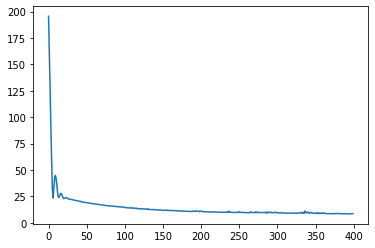

In [29]:
import matplotlib.pyplot as plt

plt.plot( history.history['loss'] )
plt.show()

72


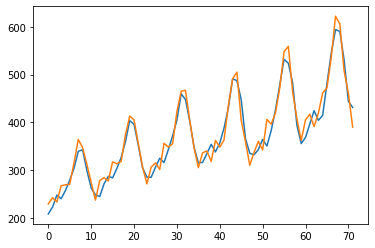

In [30]:
pred = model.predict(val_X)

print(len(pred))

plt.plot(pred),
plt.plot(val_y)
plt.show()